In [ ]:
#importing libraries 
import os
import pandas as pd # pandas 
import numpy as np #numpy 
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, KFold
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score
import glob
from tqdm import tqdm
sns.set_theme(style="dark")

In [ ]:
# loading the data 
train = pd.read_csv('../input/optiver-realized-volatility-prediction/train.csv')
test = pd.read_csv('../input/optiver-realized-volatility-prediction/test.csv')
sample= pd.read_csv('../input/optiver-realized-volatility-prediction/sample_submission.csv')

In [ ]:
print(train.columns)
print(test.columns)
print(sample.columns)

Submissions are evaluated using the root mean square percentage error, defined as:

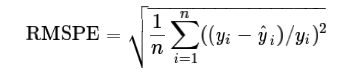

In [ ]:
EPSILON =  1e-10 # Yes, Python is awesome and supports scientific notation!
def rmspe(y_true,y_pred): 
    
    rmspe1 = (np.sqrt(np.mean(np.square((y_true - y_pred) / (y_true + EPSILON))))) 
    return rmspe1

y_true=train['target']
#print(y_true)
y_pred=train['target'].mean()
print(y_pred)
rmspe_train=rmspe(y_true,y_pred)
print(rmspe_train)

# Calculation of daily target
Now, we are going to calculate the daily target of the stock investment based on the percentage of the close price changes. This can be done just by one line of Python script.

In [ ]:
train['target1'] = 100 * (train['stock_id'].pct_change())

The pct_change method will automatically calculate the percentage changes of the current day’s close price compared with the previous day. Please note the percentage changes can be either positive or negative depending on the direction of the price changes. The resulting percentage changes are stored in the dataframe new column, “target”.

# Plotting graph

In [ ]:
train.dropna(inplace=True)
fig=plt.figure()
fig.set_figwidth(12)
plt.plot(train['target1'], label ='time_id')
plt.legend(loc='upper right')
plt.title('Daily target')
plt.show()


# Calculation of daily, monthly, and annual volatility
Here we are going to calculate the volatility of the stock in three levels: daily, monthly and annual.

In [ ]:
#import statistics
#variance=statistics.variance(train['target'], y_pred)
#volatility=np.sqrt(variance)
#print(volatility)
#daily_volatility=np.sqrt(252)*volatility
#print(daily_volatility)

In [ ]:
daily_volatility = train['target'].std()
print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

monthly_volatility = np.sqrt(21) * daily_volatility
print ('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

annual_volatility = np.sqrt(252) * daily_volatility
print ('Annual volatility: ', '{:.2f}%'.format(annual_volatility ))

In [ ]:
fig=plt.figure()
fig.set_figwidth(12)
plt.plot(train['target'], label ='daily_volatility')
plt.legend(loc='upper right')
plt.title('Daily Volatility')
plt.show()


In [ ]:
#test_volatility = pd.DataFrame({'stock_id': stock_id, 'time_id': time_id, 'volatility': relvol})

In [ ]:
submission = pd.DataFrame({'row_id' : [], 'target' : []})  
submission['row_id'] = train.apply(lambda x: str(int(x.stock_id)) + '-' + str(int(x.time_id)), axis=1)
submission['target'] = train["target"]

submission.to_csv('submission.csv',index = False)